In [1]:
%matplotlib inline

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [3]:
coffee_dataset = pd.read_csv("data/merged_data_cleaned.csv", index_col = 0)

In [4]:
coffee_dataset

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [5]:
coffee_dataset.shape

(1339, 43)

<span style="color: green;">The dataset includes 1339 observations and 43 features (42 characteristics describing the coffee + index column).</span>

In [6]:
coffee_dataset.dtypes # checking types of the features according to pandas

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

#### Exploring some questionable features in relation to type

In [7]:
coffee_dataset["unit_of_measurement"].value_counts()

unit_of_measurement
m     1157
ft     182
Name: count, dtype: int64

In [8]:
coffee_dataset.Quakers.value_counts(dropna = False)

Quakers
0.0     1244
1.0       39
2.0       30
4.0        5
5.0        5
3.0        5
6.0        4
7.0        3
11.0       1
NaN        1
9.0        1
8.0        1
Name: count, dtype: int64

In [9]:
coffee_dataset.Moisture.value_counts(dropna = False)

Moisture
0.11    383
0.12    294
0.00    264
0.10    182
0.13     76
0.09     27
0.14     23
0.08     16
0.01     15
0.15      8
0.05      8
0.02      7
0.06      7
0.07      5
0.16      5
0.04      4
0.03      4
0.20      3
0.17      3
0.18      2
0.28      1
0.21      1
0.22      1
Name: count, dtype: int64

In [10]:
coffee_dataset["Total.Cup.Points"].value_counts(dropna = False)

Total.Cup.Points
83.00    39
83.17    38
82.42    32
82.75    30
82.33    29
         ..
76.75     1
76.50     1
76.42     1
76.25     1
73.75     1
Name: count, Length: 180, dtype: int64

In [11]:
coffee_dataset["Cupper.Points"].value_counts(dropna = False)

Cupper.Points
7.50     154
7.58     138
7.33     115
7.67     115
7.42     104
7.83      87
7.75      87
7.25      85
7.17      64
7.92      55
8.00      54
7.00      50
7.08      38
8.08      24
6.83      21
6.67      20
8.17      20
6.92      19
6.75      14
8.33       9
8.50       8
8.58       6
8.25       6
8.42       6
6.50       6
6.58       6
6.42       5
10.00      4
6.33       3
6.17       3
8.67       2
6.00       1
6.25       1
8.75       1
5.42       1
5.25       1
5.17       1
8.13       1
8.83       1
9.00       1
9.25       1
0.00       1
Name: count, dtype: int64

In [214]:
# Rearranging the features' types

features_type_table = {
    "string": ["Species", "Owner", "Country.of.Origin", "Farm.Name","Lot.Number", "Mill", 
               "ICO.Number", "Company", "Region", "Producer", "In.Country.Partner", 
               "Owner.1", "Variety", "Processing.Method", "Color", "Certification.Body", 
               "Certification.Address", "Certification.Contact", "unit_of_measurement"],
    "numerical": ["Altitude", "Number.of.Bags", "Bag.Weight", "Aroma", "Flavor", "Aftertaste", 
                  "Acidity", "Body", "Balance", "Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points",
                 "Total.Cup.Points", "Moisture", "altitude_low_meters", "altitude_high_meters", "altitude_mean_meters"],
    "categorical": ["Harvest.Year", "Category.One.Defects", "Quakers", "Category.Two.Defects"],
    "datetime": ["Grading.Date", "Expiration"]
}

"""I have doubts that the following varaibles ("Aroma", "Flavor", "Aftertaste", "Acidity", "Body", "Balance", 
"Uniformity", "Clean.Cup", "Sweetness", "Cupper.Points", "Total.Cup.Points", "Moisture") are categorical then numerical, 
since they take float values and do not take int values from 1 to 10 how it would be if they were rated by people """

flattened_data = []

for type, features in features_type_table.items():
    for feature in features:
        flattened_data.append((feature, type))


features_type_table_dataframe = pd.DataFrame(flattened_data, columns=["Feature", "Type"]) # Create DataFrame


print(features_type_table_dataframe)

                  Feature         Type
0                 Species       string
1                   Owner       string
2       Country.of.Origin       string
3               Farm.Name       string
4              Lot.Number       string
5                    Mill       string
6              ICO.Number       string
7                 Company       string
8                  Region       string
9                Producer       string
10     In.Country.Partner       string
11                Owner.1       string
12                Variety       string
13      Processing.Method       string
14                  Color       string
15     Certification.Body       string
16  Certification.Address       string
17  Certification.Contact       string
18    unit_of_measurement       string
19               Altitude    numerical
20         Number.of.Bags    numerical
21             Bag.Weight    numerical
22                  Aroma    numerical
23                 Flavor    numerical
24             Aftertaste

<span style="color: green;">There are 18 strings, 18 numerical, 4 categorical and 2 dates (the index column is not taken into account).</span> 

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [13]:
coffee_dataset.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [14]:
# Rename the columns

old_names = ['Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']


new_names = {}
for old_name in old_names:
    new_name = old_name.lower()
    while "." in new_name:
        new_name = new_name.replace(".", "_")
    new_names[old_name] = new_name


coffee_dataset_renamed = coffee_dataset.rename(columns=new_names)
coffee_dataset_renamed.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [15]:
coffee_dataset_renamed

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [16]:
coffee_dataset_renamed.bag_weight

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    5 lbs
1338    5 lbs
Name: bag_weight, Length: 1339, dtype: object

In [17]:
# convert lbs to kg
def convert_lbs_to_kg(value):
    if isinstance(value, str) and 'lbs' in value:
        value = value.replace('lbs', '').strip()
        try:
            value = float(value)
            value = value / 0.45359237  # Convert lbs to kilograms
            value = f"{value:.2f}"
            return value
        except ValueError:
            return value  # If conversion fails, return the original value
    return value 

In [18]:
coffee_dataset_renamed.bag_weight.apply(convert_lbs_to_kg)

0       60 kg
1       60 kg
2           1
3       60 kg
4       60 kg
        ...  
1334     2 kg
1335     2 kg
1336     1 kg
1337    11.02
1338    11.02
Name: bag_weight, Length: 1339, dtype: object

In [19]:
coffee_dataset_renamed.bag_weight = coffee_dataset_renamed.bag_weight.apply(convert_lbs_to_kg)

In [20]:
# remove "kg" from values
def remove_kg_from_cells(value):
    if isinstance(value, str) and "kg" in value:
        if "," in value:
            value = value.replace(',', '').strip()
        value = value[:-3]
    return value

In [21]:
coffee_dataset_renamed.bag_weight.apply(remove_kg_from_cells)

0          60
1          60
2           1
3          60
4          60
        ...  
1334        2
1335        2
1336        1
1337    11.02
1338    11.02
Name: bag_weight, Length: 1339, dtype: object

In [22]:
coffee_dataset_renamed.bag_weight = coffee_dataset_renamed.bag_weight.apply(remove_kg_from_cells)

In [23]:
coffee_dataset_renamed.bag_weight.value_counts() # check data. All values are cleaned!

bag_weight
1         339
60        256
69        200
70        156
2         124
220.46     59
30         29
11.02      23
6          21
50         14
20         14
10         11
59         10
2.20        8
6.61        7
5           7
4.41        5
8.82        4
18975       4
80          4
46          3
0.00        3
29          2
19200       2
12000       2
35          2
66          2
40          2
25          2
15          2
9000        2
8           1
3           1
350         1
121.25      1
67          1
4           1
24          1
100         1
176.37      1
660         1
1500        1
13800       1
0           1
1218        1
34          1
18          1
330.69      1
18000       1
291.01      1
286.60      1
Name: count, dtype: int64

In [24]:
# convert data type to float, since they were mixed int and float values
coffee_dataset_renamed.bag_weight = coffee_dataset_renamed.bag_weight.astype(float) 

In [25]:
coffee_dataset_renamed.bag_weight.value_counts()

bag_weight
1.00        339
60.00       256
69.00       200
70.00       156
2.00        124
220.46       59
30.00        29
11.02        23
6.00         21
50.00        14
20.00        14
10.00        11
59.00        10
2.20          8
6.61          7
5.00          7
4.41          5
8.82          4
18975.00      4
80.00         4
0.00          4
46.00         3
29.00         2
19200.00      2
12000.00      2
35.00         2
66.00         2
40.00         2
25.00         2
15.00         2
9000.00       2
8.00          1
3.00          1
350.00        1
121.25        1
67.00         1
4.00          1
24.00         1
100.00        1
176.37        1
660.00        1
1500.00       1
13800.00      1
1218.00       1
34.00         1
18.00         1
330.69        1
18000.00      1
291.01        1
286.60        1
Name: count, dtype: int64

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

<span style="color: green;">1. Converting expiration dates and grading dates to datetime</span>
<span style="color: green;">2. Cleaning harvest years</span>

### expiration

In [26]:
coffee_dataset_renamed.expiration.value_counts()

expiration
July 11th, 2013        25
December 26th, 2014    25
June 6th, 2013         19
August 30th, 2013      18
July 26th, 2013        15
                       ..
March 8th, 2012         1
May 11th, 2012          1
December 1st, 2012      1
April 27th, 2013        1
December 23rd, 2015     1
Name: count, Length: 566, dtype: int64

In [27]:
# removing suffixes from dates
def clean_date_from_suffix(date_value):
    for suffix in ['st', 'nd', 'rd', 'th']:
        if suffix in date_value:
            # Split the string to avoid removing 'st' from 'August'
            parts = date_value.split()
            parts[1] = parts[1].replace(suffix, '')
            date_value = ' '.join(parts)
    return date_value

In [28]:
coffee_dataset_renamed.expiration.apply(clean_date_from_suffix) # checking values after applying the function "clean_date_from_suffix" to the values

0           April 3, 2016
1           April 3, 2016
2            May 31, 2011
3          March 25, 2016
4           April 3, 2016
              ...        
1334     January 18, 2017
1335     January 18, 2017
1336    December 23, 2015
1337      August 25, 2015
1338      August 25, 2015
Name: expiration, Length: 1339, dtype: object

In [29]:
coffee_dataset_renamed.expiration = coffee_dataset_renamed.expiration.apply(clean_date_from_suffix) # saving values after applying the function

In [30]:
coffee_dataset_renamed.expiration = pd.to_datetime(coffee_dataset_renamed.expiration) # converting to datetime

In [31]:
coffee_dataset_renamed.expiration.value_counts() # checking values

expiration
2014-12-26    25
2013-07-11    25
2013-06-06    19
2013-08-30    18
2013-07-26    15
              ..
2014-01-21     1
2018-08-08     1
2017-04-04     1
2018-09-19     1
2015-12-23     1
Name: count, Length: 565, dtype: int64

In [32]:
coffee_dataset_renamed.expiration.dtypes # checking type of expiration data

dtype('<M8[ns]')

### grading_date

In [33]:
coffee_dataset_renamed.grading_date.value_counts()

grading_date
July 11th, 2012        25
December 26th, 2013    24
June 6th, 2012         19
August 30th, 2012      18
July 26th, 2012        15
                       ..
March 9th, 2011         1
May 12th, 2011          1
December 2nd, 2011      1
April 27th, 2012        1
December 23rd, 2014     1
Name: count, Length: 567, dtype: int64

In [34]:
coffee_dataset_renamed.grading_date.apply(clean_date_from_suffix) # checking values after applying the function "clean_date_from_suffix" to the values

0           April 4, 2015
1           April 4, 2015
2            May 31, 2010
3          March 26, 2015
4           April 4, 2015
              ...        
1334     January 19, 2016
1335     January 19, 2016
1336    December 23, 2014
1337      August 25, 2014
1338      August 25, 2014
Name: grading_date, Length: 1339, dtype: object

In [35]:
coffee_dataset_renamed.grading_date = coffee_dataset_renamed.grading_date.apply(clean_date_from_suffix) 

In [36]:
coffee_dataset_renamed.grading_date = pd.to_datetime(coffee_dataset_renamed.grading_date) # converting to datetime

In [37]:
coffee_dataset_renamed.grading_date.value_counts()

grading_date
2013-12-26    25
2012-07-11    25
2012-06-06    19
2012-08-30    18
2012-07-26    15
              ..
2013-01-21     1
2017-08-08     1
2016-04-04     1
2017-09-19     1
2014-12-23     1
Name: count, Length: 565, dtype: int64

In [38]:
coffee_dataset_renamed.grading_date.dtype # checking type of grading_date

dtype('<M8[ns]')

### harvest_year

In [39]:
coffee_dataset_renamed.harvest_year.unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

<span style="color: green;">Since some values do not contain any information about the year, the corresponding rows will be lost</span>

In [40]:
coffee_dataset_renamed.harvest_year.astype(float, errors = "ignore")

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: harvest_year, Length: 1339, dtype: object

In [41]:
is_year = coffee_dataset_renamed.harvest_year.str.isnumeric() == True
is_year.fillna(False)

0        True
1        True
2       False
3        True
4        True
        ...  
1334     True
1335     True
1336     True
1337     True
1338     True
Name: harvest_year, Length: 1339, dtype: bool

In [43]:
coffee_dataset_renamed.loc[is_year, 'harvest_year'] = coffee_dataset_renamed.loc[is_year, 'harvest_year'].astype(int)
coffee_dataset_cleaned = coffee_dataset_renamed[is_year] # keeping only the data with valid harvest years

In [46]:
coffee_dataset_cleaned.shape

(1128, 43)

In [45]:
coffee_dataset_cleaned.harvest_year.value_counts()

harvest_year
2012    354
2014    233
2013    181
2015    129
2016    124
2017     70
2011     26
2010     10
2018      1
Name: count, dtype: int64

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [48]:
coffee_dataset_renamed.country_of_origin.value_counts(dropna = False)

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

<span style="color: green;">There is only one unknown country</span>

In [62]:
# excluding the coffee with unknown country of origin from the dataset.
coffee_dataset_renamed_with_known_countries = coffee_dataset_renamed[pd.notna(coffee_dataset_renamed.country_of_origin)]

In [63]:
coffee_dataset_renamed_with_known_countries.country_of_origin.value_counts(dropna = False) # cheking the new dataset for NaN values

country_of_origin
Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
India                            14
Malawi                           11
United States                    10
Peru                             10
Myanmar                           8
Vietnam                           8
Haiti                             6
Philippines                       5
United States (Puerto Rico)       4
Panama                            4
Ecuador   

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

In [68]:
coffee_dataset_renamed.owner.value_counts(dropna=False)

owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 316, dtype: int64

In [69]:
coffee_dataset_renamed.owner_1.value_counts(dropna=False)

owner_1
Juan Luis Alvarado Romero           155
Racafe & Cia S.C.A                   60
Exportadora de Cafe Condor S.A       54
Kona Pacific Farmers Cooperative     52
Ipanema Coffees                      50
                                   ... 
ALVARO QUIROS PEREZ                   1
OLIVIA HERNANDEZ VIRVES               1
FINCA LAS NIEVES                      1
Pedro Santos e Silva                  1
James Moore                           1
Name: count, Length: 320, dtype: int64

In [72]:
coffee_dataset_renamed.producer.value_counts(dropna=False)

producer
NaN                             232
La Plata                         30
Ipanema Agrícola SA              22
Doi Tung Development Project     17
VARIOS                           12
                               ... 
雅慕伊                               1
Kucofa farmers group              1
GRUPO MEDINA                      1
COFFEE COMPANY / CAFECOL          1
Cafe Cazengo                      1
Name: count, Length: 693, dtype: int64

<span style="color: green;">There is one case with unknown owner, owner_1 and producer</span>

In [77]:
coffee_dataset_renamed["country_of_origin"][coffee_dataset_renamed.owner == "NaN"]

Series([], Name: country_of_origin, dtype: object)

In [78]:
# checking if owner and owner_1 are the different
owner_comparison = coffee_dataset_renamed.owner == coffee_dataset_renamed.owner_1

In [81]:
owner_comparison.sum()

3

In [83]:
(~owner_comparison).sum()

1336

<span style="color: green;">Almost all values in the columns "owner" and "owner_1" differ</span>

In [89]:
# checking if owner and producer have same values
owner_producer_comparison = coffee_dataset_renamed.owner == coffee_dataset_renamed.producer

In [90]:
owner_producer_comparison.sum()

0

In [91]:
(~owner_producer_comparison).sum()

1339

<span style="color: green;">"owner" and "producer" have no common values</span>

In [87]:
# the case with unknown owner, owner_1 and producer can be excluded
coffee_dataset_renamed_with_known_owners = coffee_dataset_renamed[pd.notna(coffee_dataset_renamed.owner)]

In [88]:
coffee_dataset_renamed_with_known_owners.owner.value_counts(dropna = False)

owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 315, dtype: int64

### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

### Grouping by color and country

In [98]:
# grouping the data by country and color
coffee_dataset_renamed.groupby(['country_of_origin', 'color']).size()

country_of_origin            color       
Brazil                       Blue-Green      14
                             Bluish-Green    12
                             Green           92
Burundi                      Green            1
China                        Green           16
                                             ..
United States (Hawaii)       Green           21
United States (Puerto Rico)  Bluish-Green     1
                             Green            3
Vietnam                      Bluish-Green     1
                             Green            3
Length: 79, dtype: int64

In [95]:
# saving the data in a new dataset
color_country_data = coffee_dataset_renamed.groupby(['country_of_origin', 'color']).size().reset_index(name ='count')

In [96]:
color_country_data

,country_of_origin,color,count
0,Brazil,Blue-Green,14
1,Brazil,Bluish-Green,12
2,Brazil,Green,92
3,Burundi,Green,1
4,China,Green,16
...,...,...,...
74,United States (Hawaii),Green,21
75,United States (Puerto Rico),Bluish-Green,1
76,United States (Puerto Rico),Green,3
77,Vietnam,Bluish-Green,1


In [154]:
color_country_data.color.unique() # checking available colors

array(['Blue-Green', 'Bluish-Green', 'Green'], dtype=object)

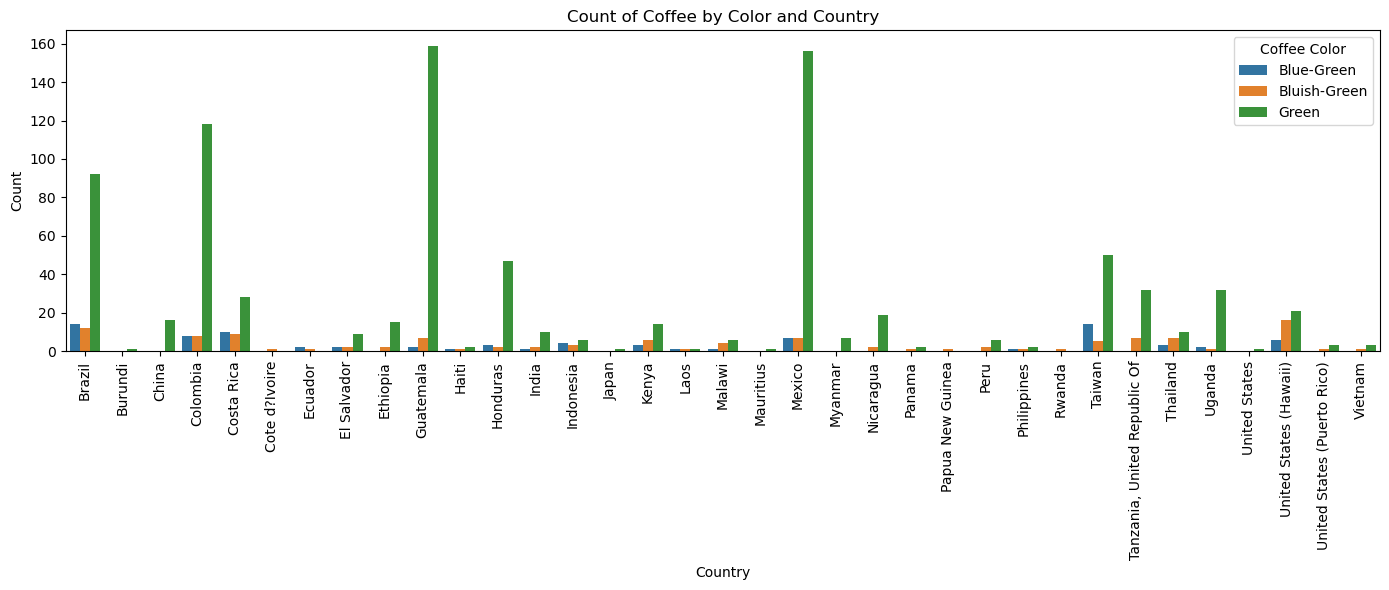

In [142]:
# Plotting the count of different colors coffee by countries
plt.figure(figsize=(14, 6))
sns.barplot(x = "country_of_origin", y = "count", hue = "color", data = color_country_data)
plt.title('Count of Coffee by Color and Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Coffee Color')
plt.tight_layout()
plt.show()

In [147]:
color_country_data[color_country_data.color == "Green"].country_of_origin.value_counts()

country_of_origin
Brazil                          1
Mauritius                       1
United States (Puerto Rico)     1
United States (Hawaii)          1
United States                   1
Uganda                          1
Thailand                        1
Tanzania, United Republic Of    1
Taiwan                          1
Philippines                     1
Peru                            1
Panama                          1
Nicaragua                       1
Myanmar                         1
Mexico                          1
Malawi                          1
Burundi                         1
Laos                            1
Kenya                           1
Japan                           1
Indonesia                       1
India                           1
Honduras                        1
Haiti                           1
Guatemala                       1
Ethiopia                        1
El Salvador                     1
Costa Rica                      1
Colombia                      

In [158]:
color_country_data[color_country_data.color == "Green"]["count"].sum() # checking amount of green coffees

870

In [148]:
color_country_data[color_country_data.color == "Blue-Green"].country_of_origin.value_counts()

country_of_origin
Brazil                    1
Kenya                     1
Uganda                    1
Thailand                  1
Taiwan                    1
Philippines               1
Mexico                    1
Malawi                    1
Laos                      1
Indonesia                 1
Colombia                  1
India                     1
Honduras                  1
Haiti                     1
Guatemala                 1
El Salvador               1
Ecuador                   1
Costa Rica                1
United States (Hawaii)    1
Name: count, dtype: int64

In [159]:
color_country_data[color_country_data.color == "Blue-Green"]["count"].sum() # checking amount of Blue-Green coffees

85

In [162]:
color_country_data[color_country_data.color == "Bluish-Green"].country_of_origin.value_counts()

country_of_origin
Brazil                          1
Mexico                          1
United States (Puerto Rico)     1
United States (Hawaii)          1
Uganda                          1
Thailand                        1
Tanzania, United Republic Of    1
Taiwan                          1
Rwanda                          1
Philippines                     1
Peru                            1
Papua New Guinea                1
Panama                          1
Nicaragua                       1
Malawi                          1
Colombia                        1
Laos                            1
Kenya                           1
Indonesia                       1
India                           1
Honduras                        1
Haiti                           1
Guatemala                       1
Ethiopia                        1
El Salvador                     1
Ecuador                         1
Cote d?Ivoire                   1
Costa Rica                      1
Vietnam                       

In [160]:
color_country_data[color_country_data.color == "Bluish-Green"]["count"].sum() # checking amount of Bluish-Green coffees

114

<span style="color: green;">The green coffee is farmed most frequently. It is the most popular color, followed far by Bluish-Green and Blue-Green.</span>

### Grouping by color and continent

In [101]:
# creating a mapper of each country to the corresponding continent
country_mapper = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo, Democratic Republic of the': 'Africa',
    'Congo, Republic of the': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Australia',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Australia',
    'Korea, North': 'Asia',
    'Korea, South': 'Asia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Australia',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Australia',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Australia',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Australia',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Australia',
    'Palestine': 'Asia',
    'Panama': 'North America',
    'Papua New Guinea': 'Australia',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Australia',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Australia',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia',
    'Vatican City': 'Europe',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

In [102]:
color_country_data['continent'] = color_country_data.country_of_origin.map(country_mapper) # adding additional column referring to the continent

In [103]:
color_country_data # checking if the new column is added

,country_of_origin,color,count,continent
0,Brazil,Blue-Green,14,South America
1,Brazil,Bluish-Green,12,South America
2,Brazil,Green,92,South America
3,Burundi,Green,1,Africa
4,China,Green,16,Asia
...,...,...,...,...
74,United States (Hawaii),Green,21,NaN
75,United States (Puerto Rico),Bluish-Green,1,NaN
76,United States (Puerto Rico),Green,3,NaN
77,Vietnam,Bluish-Green,1,Asia


In [106]:
color_country_data[['continent', 'country_of_origin', 'color', 'count']]

,continent,country_of_origin,color,count
0,South America,Brazil,Blue-Green,14
1,South America,Brazil,Bluish-Green,12
2,South America,Brazil,Green,92
3,Africa,Burundi,Green,1
4,Asia,China,Green,16
...,...,...,...,...
74,NaN,United States (Hawaii),Green,21
75,NaN,United States (Puerto Rico),Bluish-Green,1
76,NaN,United States (Puerto Rico),Green,3
77,Asia,Vietnam,Bluish-Green,1


In [107]:
color_country_data.groupby(['continent', 'color']).size()

continent      color       
Africa         Blue-Green       3
               Bluish-Green     5
               Green            6
Asia           Blue-Green       6
               Bluish-Green     7
               Green           10
Australia      Bluish-Green     1
North America  Blue-Green       6
               Bluish-Green     8
               Green            9
South America  Blue-Green       3
               Bluish-Green     4
               Green            3
dtype: int64

In [109]:
color_continent_data = color_country_data.groupby(['continent', 'color']).size().reset_index(name = 'count')

In [110]:
color_continent_data

,continent,color,count
0,Africa,Blue-Green,3
1,Africa,Bluish-Green,5
2,Africa,Green,6
3,Asia,Blue-Green,6
4,Asia,Bluish-Green,7
5,Asia,Green,10
6,Australia,Bluish-Green,1
7,North America,Blue-Green,6
8,North America,Bluish-Green,8
9,North America,Green,9


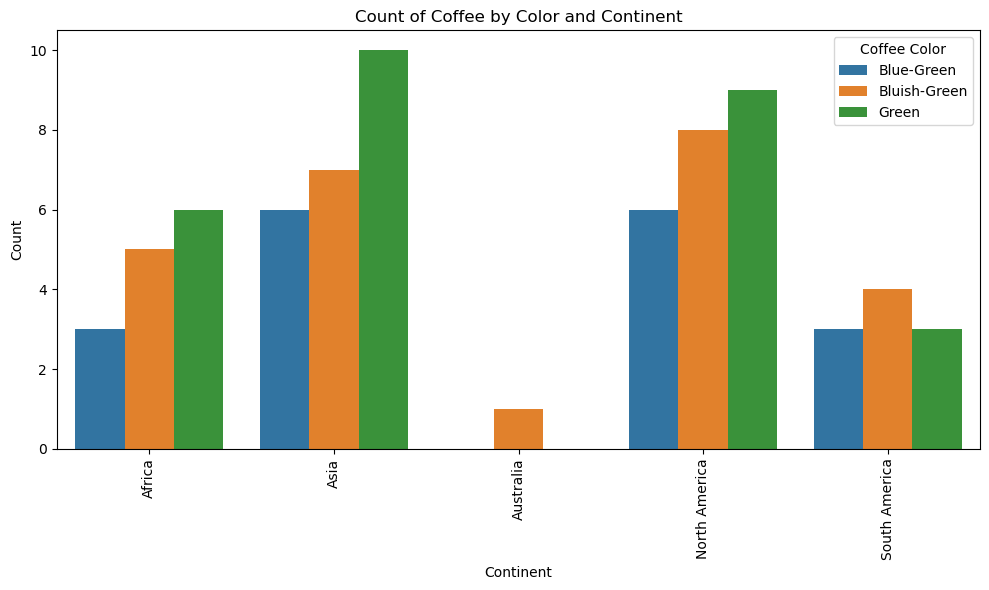

In [174]:
# Plotting the count of different colors coffee by continent
plt.figure(figsize=(10, 6))
sns.barplot(x = "continent", y = "count", hue = "color", data = color_continent_data)
plt.title('Count of Coffee by Color and Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Coffee Color')
plt.tight_layout()
plt.show()

In [175]:
color_continent_data[color_continent_data.color == "Green"]["count"].sum() # checking the amount of green coffees

28

In [176]:
color_continent_data[color_continent_data.color == "Blue-Green"]["count"].sum() # checking the amount of green coffees

18

In [177]:
color_continent_data[color_continent_data.color == "Bluish-Green"]["count"].sum() # checking the amount of green coffees

25

<span style="color: green;">The green coffee is farmed most frequently in Africa, Asia and North America.
In South America, the bluish-green coffee is more frequently farmed than the other two types.
In Australia, there are amounts of only bluish-green coffee.
In general, the amounts of green coffee (summed across all continents) surpass those of bluish-green and blue-green coffees</span> 

### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [179]:
var_ratings = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points', 'moisture']

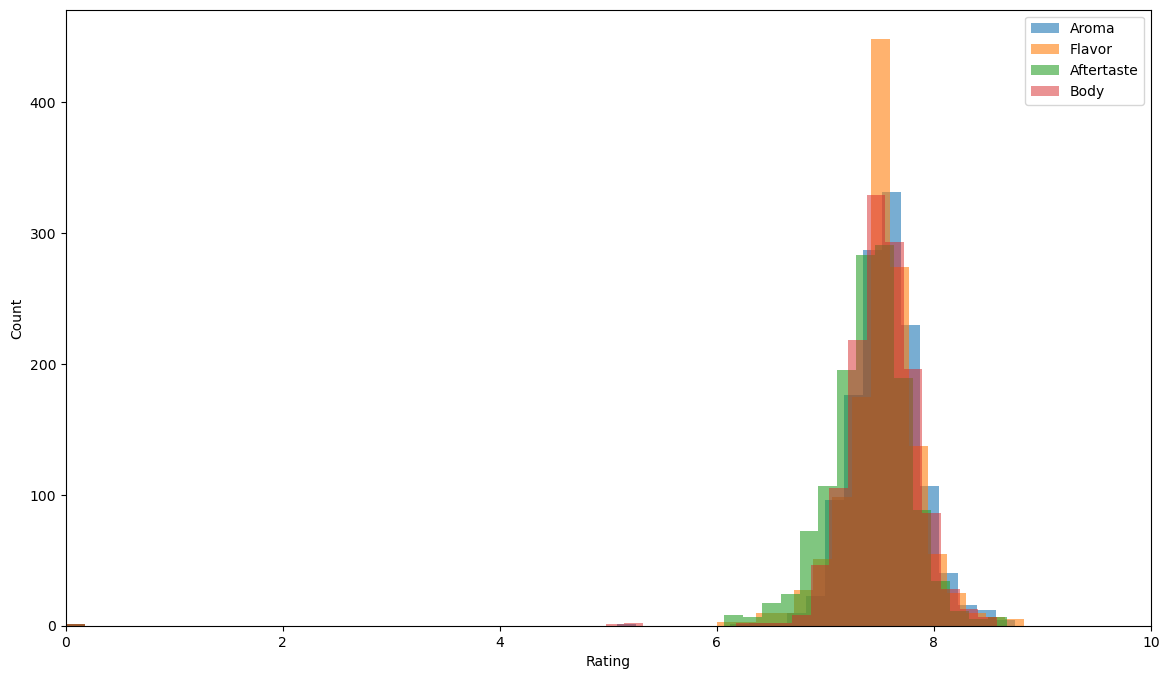

In [200]:
# plotting the varaibles to show the distribution of their values. 
# the variables are plotted on three plots, since they are hardly distinguished if they are plotted all together. 

plt.figure(figsize=(14, 8))

plt.hist(coffee_dataset_renamed["aroma"], bins = 50, label = "Aroma", alpha = 0.6)
plt.hist(coffee_dataset_renamed["flavor"], bins = 50, label = "Flavor", alpha = 0.6)
plt.hist(coffee_dataset_renamed["aftertaste"], bins = 50, label = "Aftertaste", alpha = 0.6)
plt.hist(coffee_dataset_renamed["body"], bins = 50, label = "Body", alpha = 0.5)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.xlim(0, 10)
plt.legend()

plt.show()

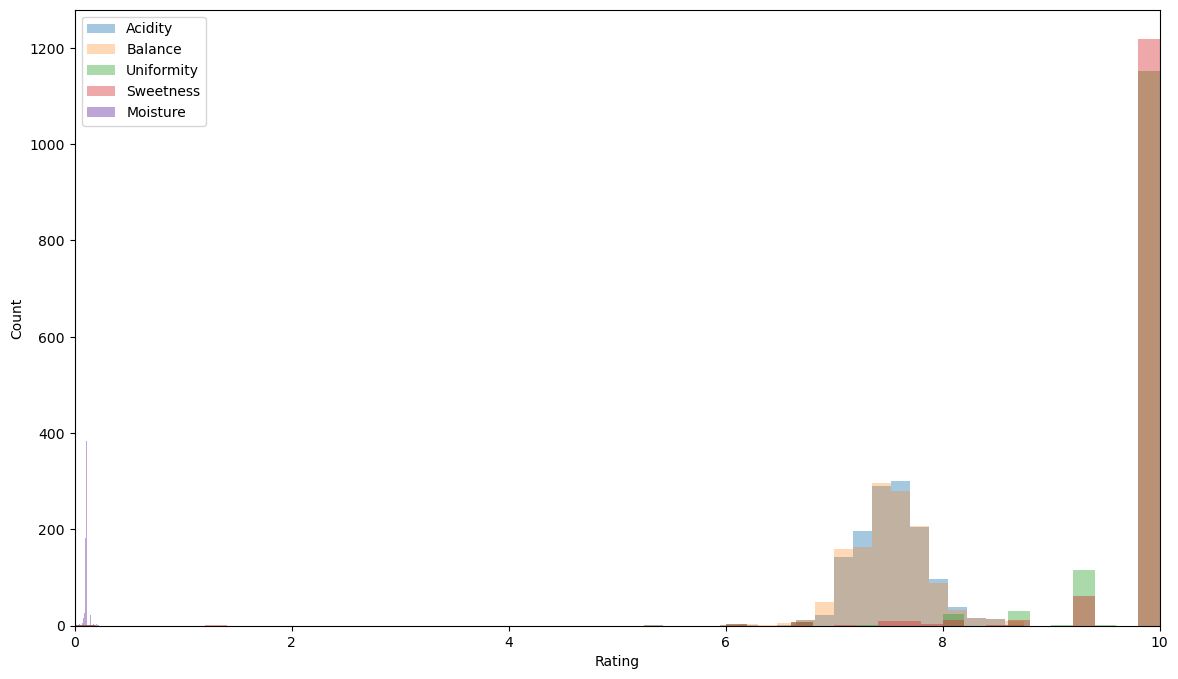

In [201]:
plt.figure(figsize=(14, 8))

plt.hist(coffee_dataset_renamed["acidity"], bins = 50, label = "Acidity", alpha = 0.4)
plt.hist(coffee_dataset_renamed["balance"], bins = 50, label = "Balance", alpha = 0.3)
plt.hist(coffee_dataset_renamed["uniformity"], bins = 50, label = "Uniformity", alpha = 0.4)
plt.hist(coffee_dataset_renamed["sweetness"], bins = 50, label = "Sweetness", alpha = 0.4)
plt.hist(coffee_dataset_renamed["moisture"], bins = 50, label = "Moisture", alpha = 0.6)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.xlim(0, 10)
plt.legend()

plt.show()

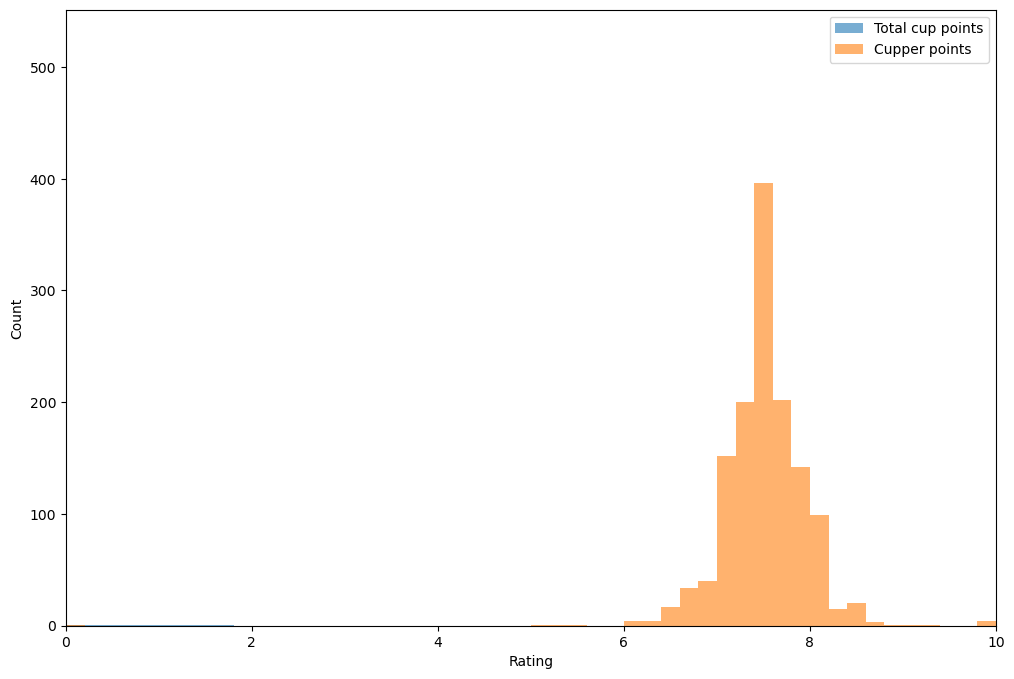

In [190]:
plt.figure(figsize=(12, 8))

plt.hist(coffee_dataset_renamed["total_cup_points"], bins = 50, label = "Total cup points", alpha = 0.6)
plt.hist(coffee_dataset_renamed["cupper_points"], bins = 50, label = "Cupper points", alpha = 0.6)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.xlim(0, 10)
plt.legend()

plt.show()

In [206]:
# calculating mean, min and max for each variable

means = []
mins = []
maxs = []


for var in var_ratings:
    means.append(coffee_dataset_renamed[var].mean())
    mins.append(coffee_dataset_renamed[var].min())
    maxs.append(coffee_dataset_renamed[var].max())

# Create a summary DataFrame
var_stats = pd.DataFrame({
    'Variable': var_ratings,
    'Mean': means,
    'Min': mins,
    'Max': maxs
})


In [203]:
var_stats

,Variable,Mean,Min,Max
0,aroma,7.566706,0.0,8.75
1,flavor,7.520426,0.0,8.83
2,aftertaste,7.401083,0.0,8.67
3,acidity,7.535706,0.0,8.75
4,body,7.517498,0.0,8.58
5,balance,7.518013,0.0,8.75
6,uniformity,9.834877,0.0,10.00
7,clean_cup,9.835108,0.0,10.00
8,sweetness,9.856692,0.0,10.00
9,cupper_points,7.503376,0.0,10.00


In [212]:
# since there is cases with values 0, it should be cleaned from the dataset 
coffee_dataset_renamed = coffee_dataset_renamed[coffee_dataset_renamed.clean_cup > 0]

In [213]:
# calculating mean, min and max for each variable on the cleaned dataset

means = []
mins = []
maxs = []


for var in var_ratings:
    means.append(coffee_dataset_renamed[var].mean())
    mins.append(coffee_dataset_renamed[var].min())
    maxs.append(coffee_dataset_renamed[var].max())

# Create a summary DataFrame
var_stats = pd.DataFrame({
    'Variable': var_ratings,
    'Mean': means,
    'Min': mins,
    'Max': maxs
})

var_stats

,Variable,Mean,Min,Max
0,aroma,7.572730,5.08,8.75
1,flavor,7.526567,6.08,8.83
2,aftertaste,7.407479,6.17,8.67
3,acidity,7.541429,5.25,8.75
4,body,7.523321,5.08,8.58
5,balance,7.524211,5.25,8.75
6,uniformity,9.842109,6.00,10.00
7,clean_cup,9.849820,1.33,10.00
8,sweetness,9.863957,1.33,10.00
9,cupper_points,7.509551,5.17,10.00


<span style="color: green;">Seven of the characteristics of the coffee (aroma, flavor, aftertaste, acidity, body, balance, and cupper_points) have mean ratings of 7.5, 3 of them (uniformity, clean_cup, sweetness) have mean values of about 9.8, the total_cup_points has a mean of 82.2, while the moisture has very small values with mean of 0.09. 
So most of variables are rated in the higher half of the rating scale.</span> 

<Axes: >

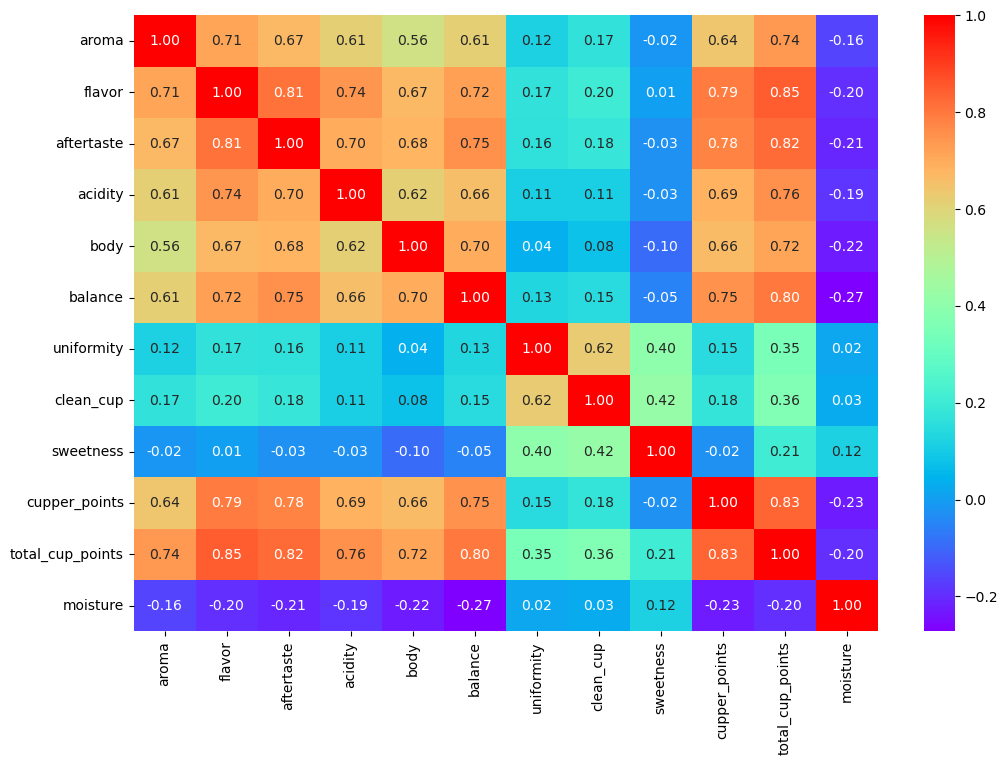

In [211]:
correlation_matrix = coffee_dataset_renamed[var_ratings].corr("spearman")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"va": "center"}, fmt = ".2f", cbar = True, cmap = plt.cm.rainbow)

<span style="color: green;">The first six variables correlate from moderate to strong with each other.
The points variables (cupper_points and total_cup_points) correlate more strongly with flavour, aftertaste and balance as well as with each other.
Uniformity and clean_cup correlate weakly with the other variables, except with each other where the correlation is moderate.
The sweetness and moisture correlate weakly and mostlt negative with the other variables.</span>

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [219]:
# grouping data by country and region
coffee_dataset_renamed.groupby(['country_of_origin', 'region']).size()

country_of_origin  region                   
Brazil             alta paulista (sao paulo)     1
                   brazil matas de minas         1
                   campos altos - cerrado        4
                   carmo de minas                2
                   cerrado                      12
                                                ..
Vietnam            don duong                     2
                   vietnam                       1
                   vietnam cau dat               1
                   vietnam tutra                 1
Zambia             mubuyu estate                 1
Length: 361, dtype: int64

In [222]:
country_region_dataset = coffee_dataset_renamed.groupby(['country_of_origin', 'region']).size().reset_index(name = 'count')

In [223]:
country_region_dataset

,country_of_origin,region,count
0,Brazil,alta paulista (sao paulo),1
1,Brazil,brazil matas de minas,1
2,Brazil,campos altos - cerrado,4
3,Brazil,carmo de minas,2
4,Brazil,cerrado,12
...,...,...,...
356,Vietnam,don duong,2
357,Vietnam,vietnam,1
358,Vietnam,vietnam cau dat,1
359,Vietnam,vietnam tutra,1


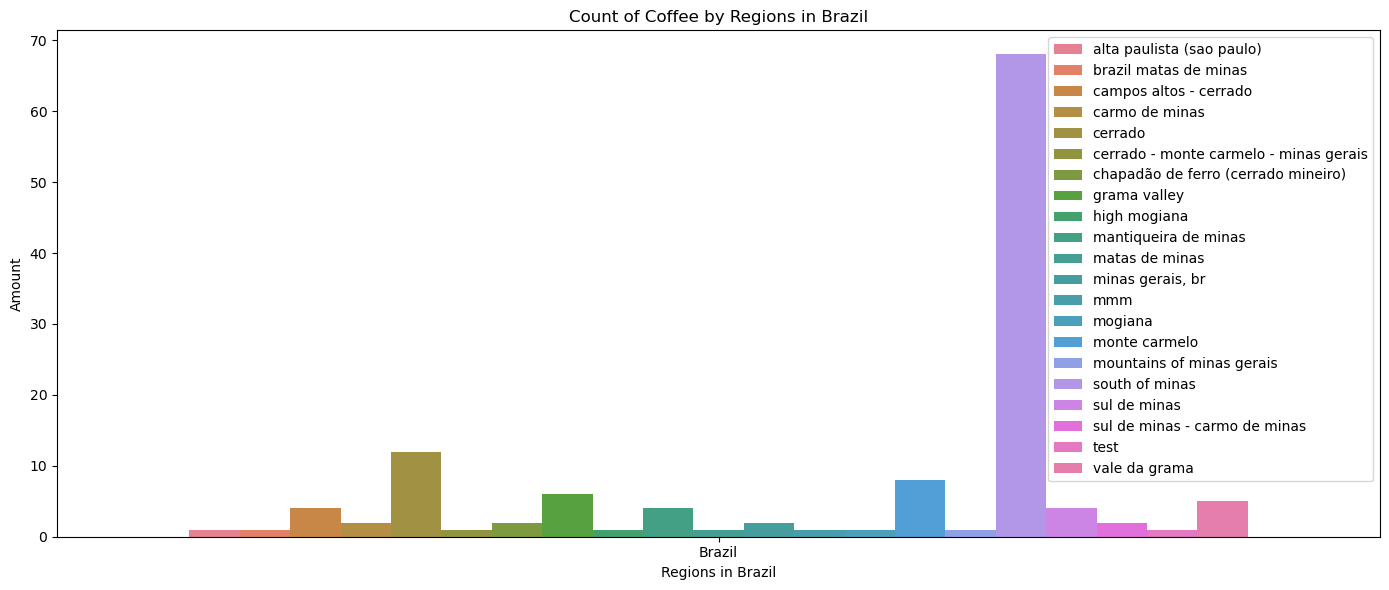

In [234]:
# Plotting the amount of coffee by regions in Brazil
plt.figure(figsize=(14, 6))
sns.barplot(data = country_region_dataset[country_region_dataset.country_of_origin == "Brazil"], x = 'country_of_origin', y = 'count', hue = 'region')
plt.title('Count of Coffee by Regions in Brazil')
plt.xlabel('Regions in Brazil')
plt.ylabel('Amount')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()

plt.tight_layout()
plt.show()

In [216]:
# grouping data by country and mean altitude
coffee_dataset_renamed.groupby(['country_of_origin', 'altitude_mean_meters']).size()

country_of_origin            altitude_mean_meters
Brazil                       1.00                    11
                             12.00                    2
                             125.00                   1
                             695.00                   1
                             872.00                   1
                                                     ..
United States (Hawaii)       609.60                   1
United States (Puerto Rico)  853.44                   4
Vietnam                      1040.00                  4
                             1550.00                  3
Zambia                       1250.00                  1
Length: 379, dtype: int64

In [218]:
# grouping data by country and company
coffee_dataset_renamed.groupby(['country_of_origin', 'company']).size()

country_of_origin            company                                
Brazil                       atlantica eportacao e importcao ltda        1
                             bourbon specialty coffees                  17
                             cafe politico                               1
                             cafebras comercio de cafés do brasil sa     4
                             café do paraíso                             2
                                                                        ..
United States (Puerto Rico)  hacienda alto grande, llc.                  4
Vietnam                      cafe politico                               1
                             royal base corporation                      2
                             sunvirtue co., ltd.                         5
Zambia                       lusso coffee lab                            1
Length: 315, dtype: int64

### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!